In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.path.expanduser("~/games"))
from connect4 import Connect4Game,Connect4Board, Connect4BitBoard
from mcts import SearchNode,MCTS
#%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
M = MCTS(Connect4BitBoard);M.compute_move(10);print(M.searchTree.num_visits)

In [ ]:
#%lprun -f MCTS.ponder M = MCTS(Connect4BitBoard); M.compute_move(10)
#%lprun -f SearchNode.update_path M = MCTS(Connect4BitBoard); M.compute_move(10)
%lprun -f SearchNode.update_path M = MCTS(Connect4Board); M.compute_move(10)

In [ ]:
%lprun -f Connect4BitBoard.make_move M = MCTS(Connect4BitBoard); M.compute_move(1)

In [ ]:
sys.getsizeof(B)

In [ ]:
%memit M=MCTS(Connect4BitBoard);M.compute_move(10)

In [ ]:

#%lprun -f M.searchTree.ucb M.compute_move(1)

In [ ]:
M = MCTS();M.compute_move(1);print(M.searchTree.num_visits)

In [ ]:
M.compute_move(1)

In [ ]:
SearchNode.reused

In [ ]:
M = MCTS(Connect4BitBoard)
for i in range(42):
    move = M.compute_move(1)
    print([c.win_ratio() for c in M.searchTree.children])
    print([c.num_visits for c in M.searchTree.children])
    print(M.searchTree.num_visits)
    outcome = M.make_move(move)
    plt.imshow(M.gameBoard.data(),vmin=-1,vmax=1,interpolation=None)
    plt.grid(which='minor', color='k',linestyle='-', linewidth=2)
    plt.gca().set_xticks(np.arange(-.5, 7, 1), minor=True);
    plt.gca().set_yticks(np.arange(-.5, 6, 1), minor=True);
    #plt.minorticks_on()
    #plt.gca().grid(which='minor', color='k', linestyle='-', linewidth=2)
    plt.show()
    if outcome: 
        print(outcome)
        break

In [9]:
C = Connect4BitBoard()

In [10]:
import time

[0, 1, 2, 3, 4, 5, 6]


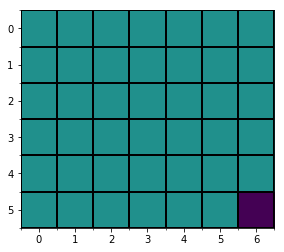

[0, 1, 2, 3, 4, 5, 6]


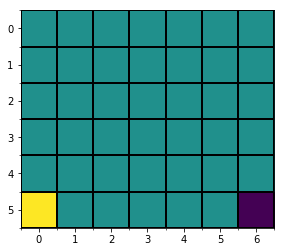

[0, 1, 2, 3, 4, 5, 6]


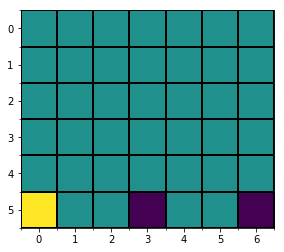

[0, 1, 2, 3, 4, 5, 6]


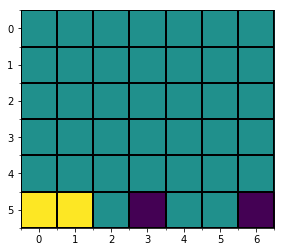

[0, 1, 2, 3, 4, 5, 6]


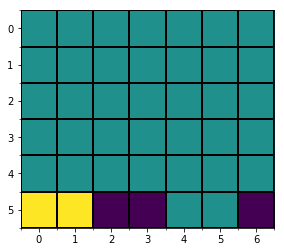

[0, 1, 2, 3, 4, 5, 6]


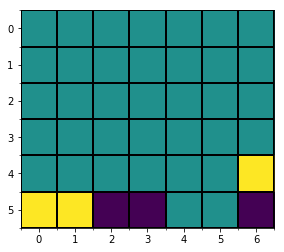

[0, 1, 2, 3, 4, 5, 6]


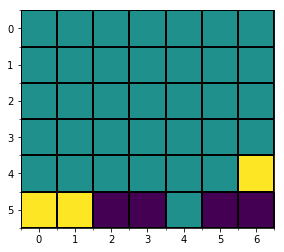

[0, 1, 2, 3, 4, 5, 6]


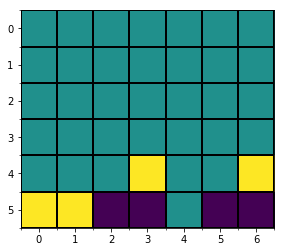

[0, 1, 2, 3, 4, 5, 6]


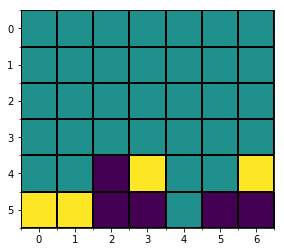

[0, 1, 2, 3, 4, 5, 6]


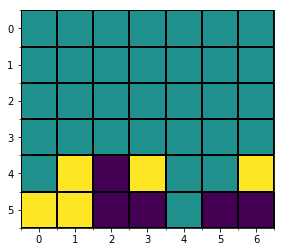

[0, 1, 2, 3, 4, 5, 6]


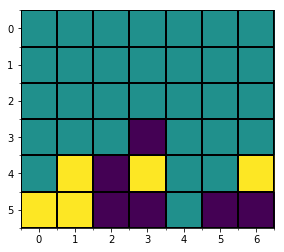

[0, 1, 2, 3, 4, 5, 6]


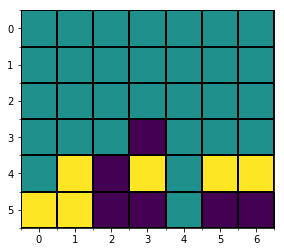

[0, 1, 2, 3, 4, 5, 6]


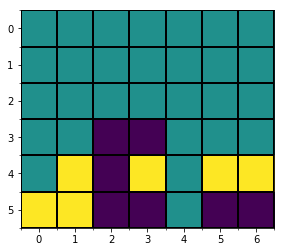

[0, 1, 2, 3, 4, 5, 6]


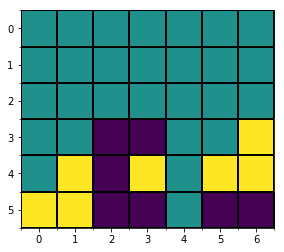

[0, 1, 2, 3, 4, 5, 6]


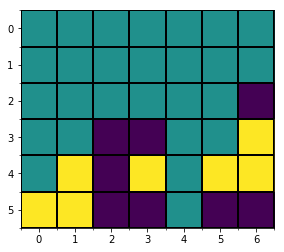

[0, 1, 2, 3, 4, 5, 6]


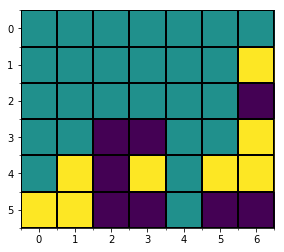

[0, 1, 2, 3, 4, 5, 6]


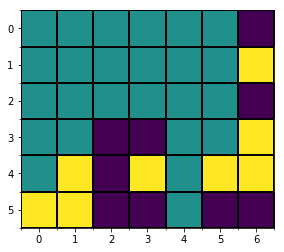

[0, 1, 2, 3, 4, 5]


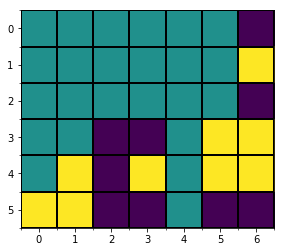

[0, 1, 2, 3, 4, 5]


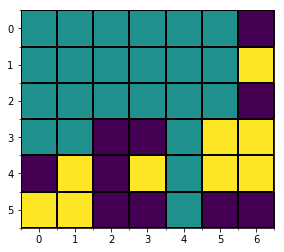

[0, 1, 2, 3, 4, 5]


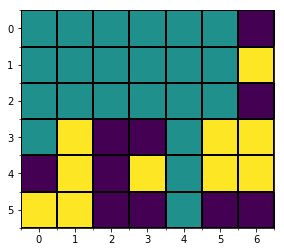

[0, 1, 2, 3, 4, 5]


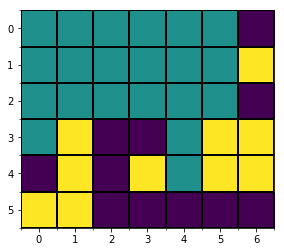

[0, 1, 2, 3, 4, 5]


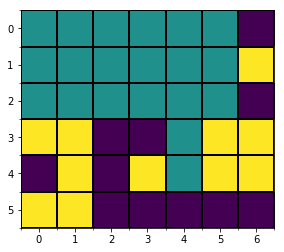

[0, 1, 2, 3, 4, 5]


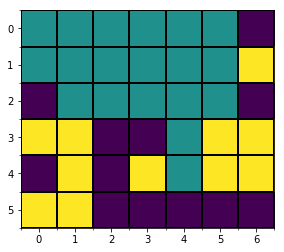

[0, 1, 2, 3, 4, 5]


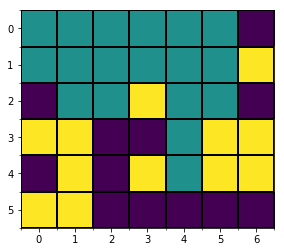

[0, 1, 2, 3, 4, 5]


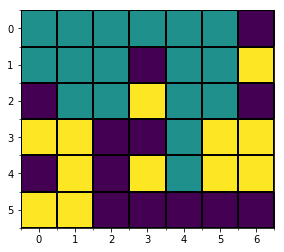

[0, 1, 2, 3, 4, 5]


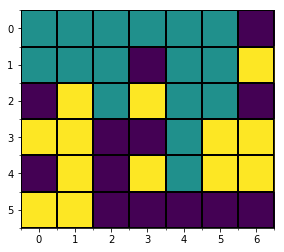

[0, 1, 2, 3, 4, 5]


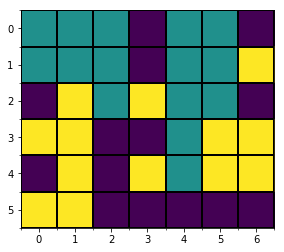

[0, 1, 2, 4, 5]


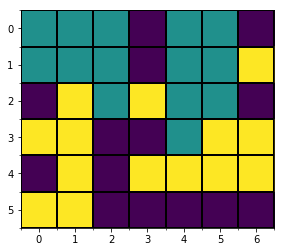

[0, 1, 2, 4, 5]


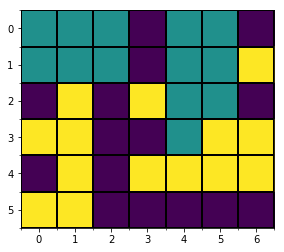

[0, 1, 2, 4, 5]


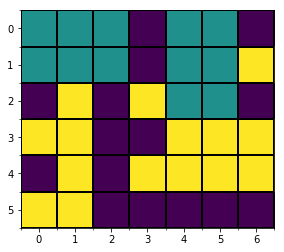

[0, 1, 2, 4, 5]


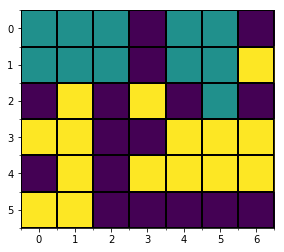

[0, 1, 2, 4, 5]


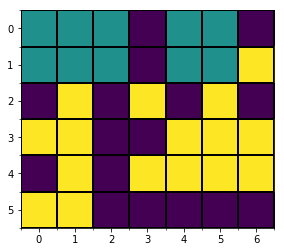

[0, 1, 2, 4, 5]


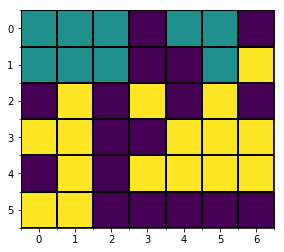

[0, 1, 2, 4, 5]


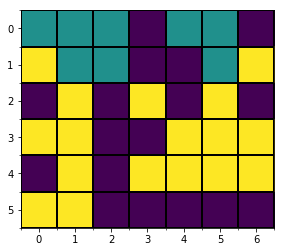

[0, 1, 2, 4, 5]


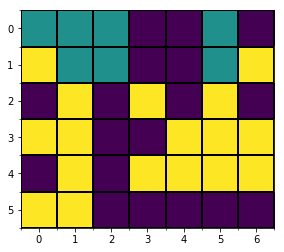

[0, 1, 2, 5]


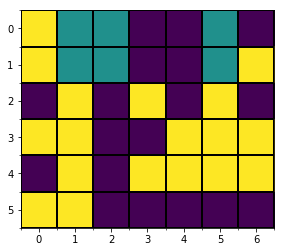

[1, 2, 5]


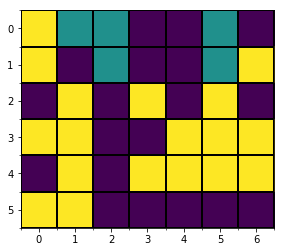

[1, 2, 5]


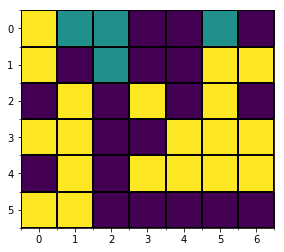

[1, 2, 5]


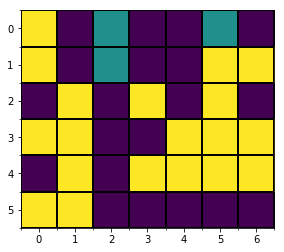

[2, 5]


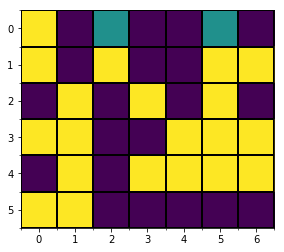

[2, 5]


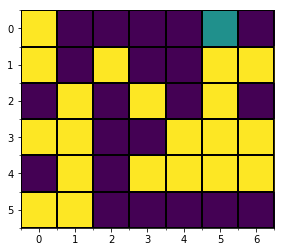

[5]


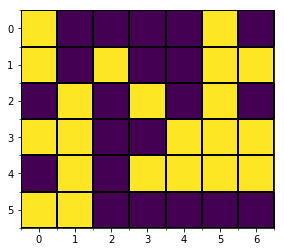

In [11]:
for i in range(42):
    print(C.get_moves())
    C.make_move(np.random.choice(C.get_moves()))
    time.sleep(.2)
    plt.imshow(C.data(),vmin=-1,vmax=1,interpolation=None)
    plt.grid(which='minor', color='k',linestyle='-', linewidth=2)
    plt.gca().set_xticks(np.arange(-.5, 7, 1), minor=True);
    plt.gca().set_yticks(np.arange(-.5, 6, 1), minor=True);
    plt.show()

In [ ]:
Node.reused

In [ ]:
[c.win_ratio() for c in M.searchTree.children]

In [ ]:
[c.num_visits for c in M.searchTree.children[4].children[4].children]

In [ ]:
C.engine.searchTree.num_visits

In [ ]:
C.engine.searchTree.num_visits

In [ ]:
M.compute_move(10)

In [ ]:
[c.num_visits for c in M.searchTree.children[3].children]

In [ ]:
M.searchTree.num_visits

In [ ]:
M.make_move(5)

In [ ]:
M.gameBoard.show()

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:
C = Connect4Game(True)

In [ ]:
C.engine.searchTree.num_visits

In [ ]:
print([c.num_visits for c in C.engine.searchTree.children])

In [ ]:
print([c.num_wins/c.num_visits for c in C.engine.searchTree.children[0].children])

In [ ]:
C.engine.searchTree.num_wins/C.engine.searchTree.num_visits

In [ ]:
print(C.engine.searchTree.terminal_outcome(C.engine.gameBoard))

In [ ]:
testboard = copy.deepcopy(C.engine.gameBoard)

In [ ]:
testboard.make_move(4)

In [ ]:
testboard.data()

In [ ]:
testboard.move_won(4)

In [ ]:
C.engine.searchTree.children[5].children[4].move

In [ ]:
print(C.engine.searchTree.children[5].children[4].terminal_outcome(testboard))

In [ ]:
print(C.engine.searchTree.children)

In [ ]:
c=1;b=2

In [ ]:
a=c=b

In [ ]:
a

In [ ]:
c